In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0
import pandas as pd
import sympy as sp
%matplotlib inline

In [2]:
T0, T1, T2, q, k, z, L, theta = sp.symbols('T0 T1 T2 q k z L theta')
n,m = sp.symbols('n m', integer = True)
expr = (T2 + (q/(2*k))*z*(z-L) + (T1-T2)*(z/L))*sp.sin((m*sp.pi*z)/L)
expr

(T2 + q*z*(-L + z)/(2*k) + z*(T1 - T2)/L)*sin(pi*m*z/L)

In [3]:
sp.integrate(expr,  (z, 0 , L))

Piecewise(((-1)**m*L**3*q/(pi**3*k*m**3) - (-1)**m*L*T1/(pi*m) - L**3*q/(pi**3*k*m**3) + L*T2/(pi*m), Ne(m, 0)), (0, True))

In [4]:
f = (T0-expr)*sp.sin((m*sp.pi*z)/L)
f

(T0 - (T2 + q*z*(-L + z)/(2*k) + z*(T1 - T2)/L)*sin(pi*m*z/L))*sin(pi*m*z/L)

In [5]:
sp.integrate(f, (theta, 0, 2*sp.pi), (z, 0, L))

Piecewise((-2*pi*(-L**3*q/(8*pi**2*k*m**2) - L*T0/(pi*m) + L*T1/(4*pi**2*m**2) - L*T2/(4*pi**2*m**2)) + 2*pi*(-(-1)**m*L*T0/(pi*m) + L**3*q/(24*k) - L*T1/4 + L*T1/(4*pi**2*m**2) - L*T2/4 - L*T2/(4*pi**2*m**2)), Ne(m, 0)), (0, True))

In [6]:
f = (T0-expr)*sp.cos(n*theta)*sp.sin((m*sp.pi*z)/L)
f

(T0 - (T2 + q*z*(-L + z)/(2*k) + z*(T1 - T2)/L)*sin(pi*m*z/L))*sin(pi*m*z/L)*cos(n*theta)

In [7]:
final_expr = (2/(L*sp.pi))*sp.integrate(f, (theta, 0, 2*sp.pi), (z, 0, L))
final_expr

2*Piecewise((0, Ne(n, 0) | (Ne(m, 0) & Ne(n, 0))), (-2*pi*(-L**3*q/(8*pi**2*k*m**2) - L*T0/(pi*m) + L*T1/(4*pi**2*m**2) - L*T2/(4*pi**2*m**2)) + 2*pi*(-(-1)**m*L*T0/(pi*m) + L**3*q/(24*k) - L*T1/4 + L*T1/(4*pi**2*m**2) - L*T2/4 - L*T2/(4*pi**2*m**2)), Ne(m, 0)), (0, True))/(pi*L)

In [8]:
def tempDistributionCylinderOne(r,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms) :
    T0 = radialSurfaceTemperature
    T1 = upperZtemp
    T2 = lowerZtemp
    k = thermalConductivity
    q = heatGenerationPerUnitVolume
    L = axialLength
    a = maxRadius
    n = noOfTerms
    
    def term1(n,T0):
        return ((2*T0)/(n*np.pi))*(1-(-1)**n)
    
    def term2(n,L,q,k,T1,T2):
        e = q/k
        t1 = (L**3)*e*(1-(-1)**n)
        t2 = (n**2)*(np.pi**2)*L*(T2-T1*((-1)**n))
        t3 = (n**3)*(np.pi**3)
        return (2/L)*((t1+t2)/t3)
    
    def term3(T1 , T2 , L , q , k , z ) :
        return (T2 + (q*z*(z-L))/(2*k)) + ((T1-T2)*z)/L
    
    b = np.zeros(n)
    for i in range(1,n):
        b[i] =  (term1(i,T0) - term2(i,L,q,k,T1,T2))*(i0(i*r)/i0(i*a))*np.sin((i*np.pi*z)/L)
        
    return b.sum() + term3(T1 , T2 , L , q , k , z )

### Checking the effect of no. of terms  

C:\Users\vibhe\AppData\Local\Temp/ipykernel_9712/1043151493.py:27: RuntimeWarning: invalid value encountered in double_scalars
  b[i] =  (term1(i,T0) - term2(i,L,q,k,T1,T2))*(i0(i*r)/i0(i*a))*np.sin((i*np.pi*z)/L)


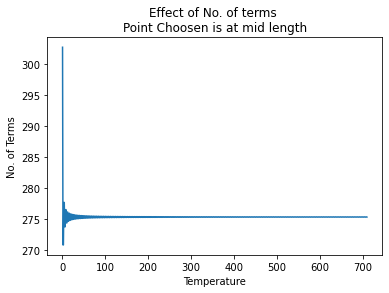

In [9]:
r = 1
maxRadius = 1 
z = np.pi/2
axialLength = np.pi
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 100
heatGenerationPerUnitVolume = 1000
noOfTerms = 700
k = []
for i in range(1,1000) :
    k.append(tempDistributionCylinderOne(r,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,i))
x = np.arange(1,1000)
plt.plot(x,k)
plt.title("Effect of No. of terms \nPoint Choosen is at mid length")
plt.xlabel("Temperature")
plt.ylabel("No. of Terms")
plt.show()


In [10]:
# As we can see that the temperature saturate at surface Temperature with increase in no. of terms 
## Now we have to check wether it satisfy its Boundary Condition or Not 

## Variation of the temperature on the Curved surface 

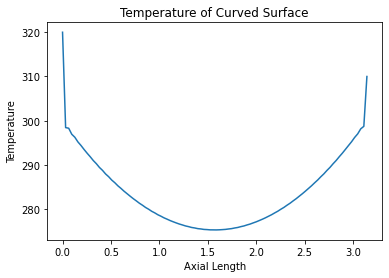

In [11]:

r = 1
maxRadius = 1 
z = np.pi/2
axialLength = np.pi
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 100
heatGenerationPerUnitVolume = 1000
noOfTerms = 700
zi = np.linspace(0,np.pi,100)
p = []
for i in zi :
    p.append(tempDistributionCylinderOne(r,maxRadius,i,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(zi,p)
plt.title("Temperature of Curved Surface")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

### Variation of the temperature on the top surface 

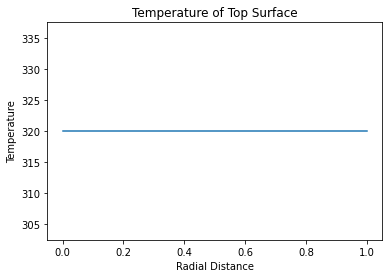

In [12]:
r = 1
maxRadius = 1 
z = np.pi/2
axialLength = np.pi
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 100
heatGenerationPerUnitVolume = 1000
noOfTerms = 700
ri = np.linspace(0,1,100)
p = []
for i in ri :
    p.append(tempDistributionCylinderOne(i,maxRadius,0,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(ri,p)
plt.title("Temperature of Top Surface")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.show()

### Variation of Temperature on top Surface

C:\Users\vibhe\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


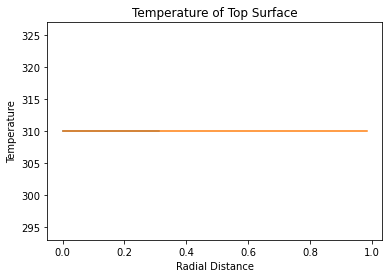

In [13]:
r = 1
maxRadius = 1 
z = np.pi
axialLength = np.pi
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 100
heatGenerationPerUnitVolume = 0
noOfTerms = 700
ri = np.linspace(0,1,100)
p = []
for i in zi :
    p.append(tempDistributionCylinderOne(i,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(ri,p)
plt.plot(zi,p)
plt.title("Temperature of Top Surface")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.show()

## Variation at centre line of the cylinder 

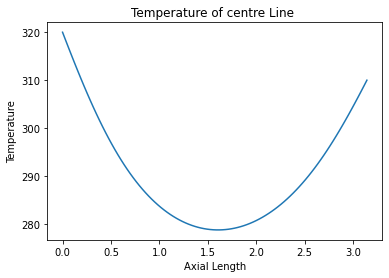

In [14]:
r = 0
maxRadius = 1 
axialLength = np.pi
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 100
heatGenerationPerUnitVolume = 1000
noOfTerms = 700
zi = np.linspace(0,np.pi,100)
p = []
for i in zi :
    p.append(tempDistributionCylinderOne(r,maxRadius,i,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(zi,p)
plt.title("Temperature of centre Line ")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

## Radail Temperature Distribution 

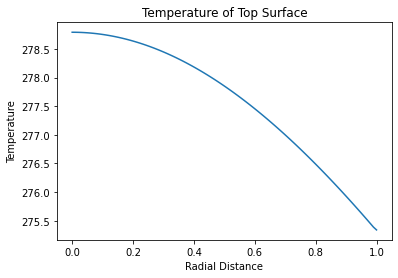

In [15]:
# Radail Temperature Distribution at the mid of the length 
r = 1
maxRadius = 1 
z = np.pi/2
axialLength = np.pi
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 100
heatGenerationPerUnitVolume = 1000
noOfTerms = 700
ri = np.linspace(0,1,100)
p = []
for i in ri :
    p.append(tempDistributionCylinderOne(i,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(ri,p)
plt.title("Temperature of Top Surface")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.show()

## Ansys WorkBech  Solution for the same problem 

In [16]:
df = pd.read_excel("Axial for q 0  r 1 L 3.14.xlsx")

In [17]:
df.head()

,Z,T
0,0.000000,320.00
1,0.000065,318.27
2,0.000131,316.58
3,0.000196,314.93
4,0.000262,313.35


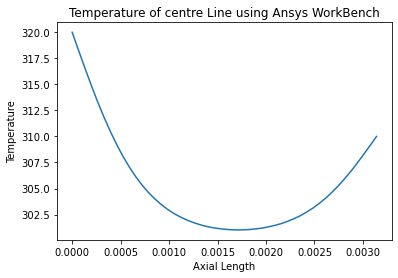

In [18]:
plt.plot(df["Z"],df["T"])
plt.title("Temperature of centre Line using Ansys WorkBench")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

## For Comparision Plotting Both of the Temperatures Together 

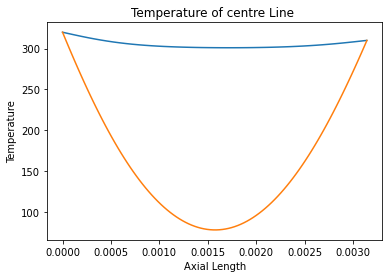

In [19]:
plt.plot(df["Z"],df["T"])
r = 0
maxRadius = 1 
axialLength = np.pi
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 100
heatGenerationPerUnitVolume = 10000
noOfTerms = 700
zi = np.linspace(0,np.pi,100)
p = []
for i in zi :
    p.append(tempDistributionCylinderOne(r,maxRadius,i,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(zi/1000,p)
plt.title("Temperature of centre Line ")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

## Radial Temperature Distribution using Ansys

In [20]:
df = pd.read_excel("RadialMid for q 0  r 1 L 3.14.xlsx")

In [21]:
df.head()

,Y,T
0,0.000000,301.10
1,0.000021,301.09
2,0.000042,301.09
3,0.000063,301.09
4,0.000083,301.08


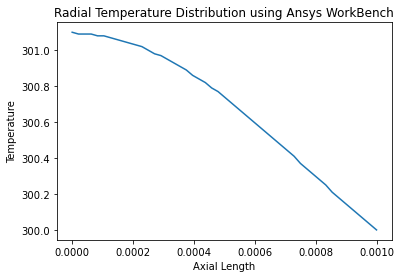

In [22]:
plt.plot(df["Y"],df["T"])
plt.title("Radial Temperature Distribution using Ansys WorkBench")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

## For Comparision Plotting Both of the Temperatures Together

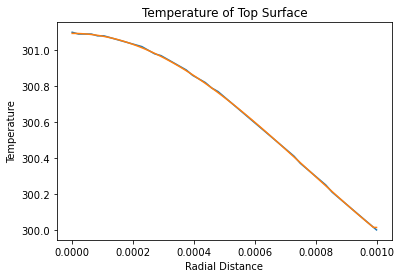

In [23]:
plt.plot(df["Y"],df["T"])
r = 1
maxRadius = 1 
z = np.pi/2
axialLength = np.pi
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 100
heatGenerationPerUnitVolume = 0
noOfTerms = 700
ri = np.linspace(0,1,100)
p = []
for i in ri :
    p.append(tempDistributionCylinderOne(i,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(ri/1000,p)
plt.title("Temperature of Top Surface")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.show()

In [24]:
def tempDistributionCylinderTwo(T1 , T2 , L , q , k , z ) :
    return (T2 + (q*z*(z-L))/(2*k)) + ((T1-T2)*z)/L

In [25]:
# Checking the variation of V(z) 
def V(z,q,k,L,T1,T2) :
    return T2 + (q*z*(L-z))/(2*k) + (T1-T2)*z/L

In [26]:
L = np.pi
r = 1 
T1 = 310
T2 = 320
k = 100
q = 10

In [27]:
z = np.linspace(0,np.pi,50)
X = []
for i in z :
    X.append(V(i,q,k,L,T1,T2))

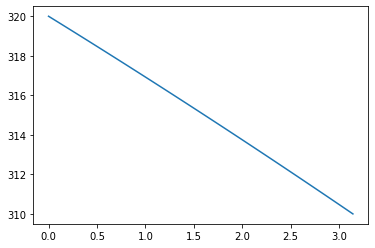

In [28]:
plt.plot(z,X)

In [29]:
def term1(n,radialSurfaceTemperature):
        return ((2*radialSurfaceTemperature)/(n*np.pi))*(1-(-1)**n)

In [30]:
a = np.arange(1,100)
b = []
for i in a :
    b.append(term1(i,300))
    

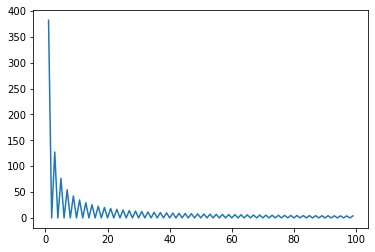

In [31]:
plt.plot(a,b)

In [32]:
def term2(L,q,k,n,T1,T2):
        e = q/k
        t1 = (L**3)*e*(1-(-1)**n)
        t2 = (n**2)*(np.pi**2)*L*(T2-T1*((-1)**n))
        t3 = (n**3)*(np.pi**3)
        return (2/L)*((t1+t2)/t3)

In [33]:
a = np.arange(1,100)
b = []
for i in a :
    b.append(term2(np.pi,0,100,i,310,320))

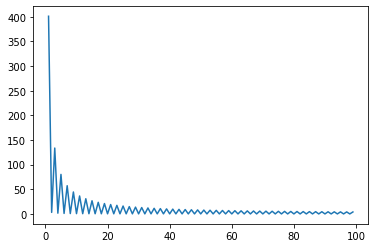

In [34]:
plt.plot(a,b)

In [35]:
import os

In [36]:
os.getcwd()

'C:\\Users\\vibhe\\OneDrive\\Desktop\\Thermal\\Jupyter NoteBook and Ansys Results for comparision'